In [1]:
import random
import time
import numpy as np
import pandas as pd
import geopandas as gpd
from geopy import geocoders 
import re
from matplotlib import pyplot as plt
import descartes
from shapely.geometry import Point, Polygon


%matplotlib inline

In [2]:
df = pd.read_csv('../data/avocado.csv')

### Some summary information

In [3]:
df.shape

(18249, 14)

In [4]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [5]:
# No missing values !?!?

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [6]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [7]:
# Removing 'Unnamed: 0' column as it appears to be some kind of index
df = df[[col for col in df.columns if col.startswith('Unnamed') ==  False]]

In [8]:
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [9]:
# Convert Date to a date type
df['Date'] = pd.to_datetime(df['Date'], format='%Y/%m/%d')

In [10]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [11]:
# Selecting columns that are 'object' type to take a look at their distrubtions
object_types = [col for col in df.columns if df[col].dtype == 'object']

In [12]:
# Pretty even distribution for both object columns
for i, col in enumerate(object_types):
    print(df[col].value_counts())
    print('\n')

conventional    9126
organic         9123
Name: type, dtype: int64


Plains                 338
NewOrleansMobile       338
Houston                338
RaleighGreensboro      338
Midsouth               338
SanDiego               338
SanFrancisco           338
HartfordSpringfield    338
LasVegas               338
Sacramento             338
Jacksonville           338
Boston                 338
West                   338
Southeast              338
Portland               338
PhoenixTucson          338
SouthCarolina          338
Nashville              338
Charlotte              338
Louisville             338
NorthernNewEngland     338
Seattle                338
Roanoke                338
Tampa                  338
California             338
TotalUS                338
Denver                 338
Indianapolis           338
Pittsburgh             338
HarrisburgScranton     338
Atlanta                338
RichmondNorfolk        338
CincinnatiDayton       338
LosAngeles             338
Columbus     

### Deeper dive into type field

In [13]:
# As expected, organic avocados are more expensive, on average
df.groupby(['type'], as_index = False).agg({'AveragePrice':'mean'})

,type,AveragePrice
0,conventional,1.158040
1,organic,1.653999


In [14]:
# Conventional seems to sell a lot more.
df.groupby(['type'], as_index = False).agg({'Total Volume':'sum'})

,type,Total Volume
0,conventional,1.508722e+10
1,organic,4.361817e+08


In [15]:
# Organic only accounts for ~ 3% of total sales
df.loc[df['type'] == 'organic', 'Total Volume'].sum() / df['Total Volume'].sum()

0.028098329568251285

### Some geographic analysis

In [16]:
# It might be helpful to view locations on a map 
nom = geocoders.Nominatim(user_agent='avocados')

In [17]:
# Creating a function to turn city into lat and long
def make_map(item):
    try:
        geocoded = nom.geocode(item)
        return pd.Series([geocoded.latitude, geocoded.longitude])
    except:
        return pd.Series([None, None])

In [18]:
# Grabbing unique regions
regions = pd.DataFrame(df['region'].unique(), columns=['region'])

In [41]:
# Since all regions are one word, we'll add a space between words
# where a capital letter indicates a new word.
def split_words(item):
    return re.sub(r"(\w)([A-Z])", r"\1 \2", item)

regions['region_tmp'] = regions['region'].apply(lambda x: split_words(x))

In [42]:
# Applying make_map function
regions[['lat', 'long']] = regions['region_tmp'].apply(lambda x: make_map(x))

In [43]:
# Joining lat, long to original dataframe
df = df.merge(regions, how = 'left', on = ['region'])

In [44]:
# Aggregating average of AveragePrice by region.
df_reg_gb = df.groupby(['region_tmp', 'long', 'lat'], as_index = False).agg({'AveragePrice':'mean'})

In [45]:
crs = {'init':'epsg:4326'}
geometry = [Point(xy) for xy in zip(df_reg_gb['long'], df_reg_gb['lat'])]

In [46]:
# Creating GeoDataFrame
geo_df = gpd.GeoDataFrame(df_reg_gb, crs = crs,
                         geometry = geometry)

In [47]:
# Reading shape file
us_map = gpd.read_file('zip:///Users/josephdoperalski/projects/joe_nolan_avocados/data/cb_2018_us_state_500k.zip')

In [48]:
us_map = us_map[~us_map['NAME']\
                .isin(['Alaska', 'Hawaii',
                       'United States Virgin Islands',
                      'Guam', 'Puerto Rico', 'American Samoa',
                      'Commonwealth of the Northern Mariana Islands'])]

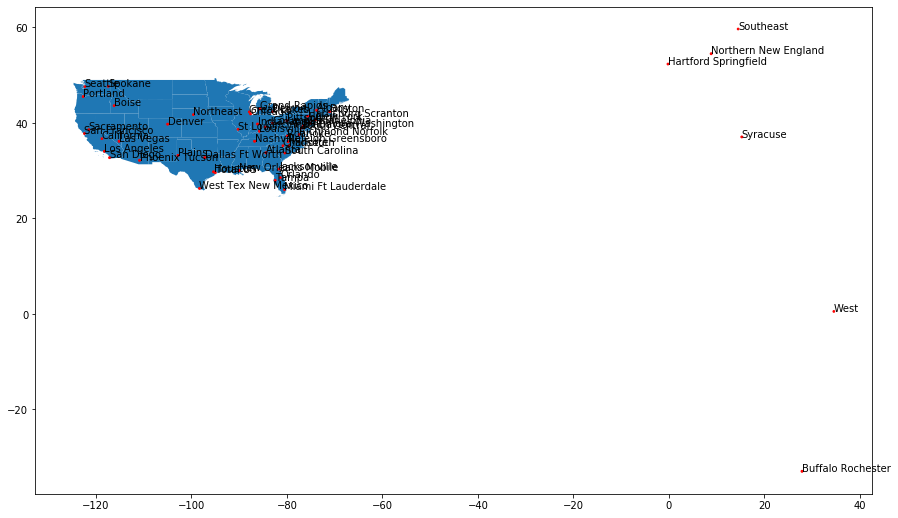

In [49]:
fix, ax = plt.subplots(figsize = (15, 15))
us_map.plot(ax=ax)
geo_df.plot(ax = ax, markersize = 3 * df['AveragePrice'], color = 'red')
for i in df_reg_gb.iterrows():
    ax.annotate(i[1]['region_tmp'], 
                (i[1]['long'],i[1]['lat']))

In [50]:
# It's pretty evident that we've got some bad data based on the above graph.
# We've isolated the erroneous data aand fixed it.
new_region_map = {'Buffalo Rochester':'Buffalo NY', 'Syracuse' : 'Syracuse NY',
'Hartford Springfield' : 'Hartford Connecticut',
'Northern New England' : 'Portland Maine',
'West Tex New Mexico': 'Albuquerque NM',
'New York' : 'New York City'}

In [51]:
# Mapping regions to the corrected names
def name_map(item, new_region_map):
    if item in new_region_map:
        return new_region_map[item]
    else:
        return item

In [59]:
df_2 = df.copy().drop(['lat', 'long'], axis = 1)
df_2['region_tmp'] = df_2['region_tmp'].apply(lambda x: name_map(x, new_region_map))

In [53]:
regions_2 = pd.DataFrame(df_2['region_tmp'].unique(), columns=['region_tmp'])

In [54]:
regions_2[['lat', 'long']] = regions_2['region_tmp'].apply(lambda x: make_map(x))

In [60]:
df_2 = df_2.merge(regions_2, how = 'left', on = ['region_tmp'])

In [61]:
df_2.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region', 'region_tmp_x', 'lat_x', 'long_x', 'region_tmp_y', 'lat_y',
       'long_y', 'region_tmp', 'lat', 'long'],
      dtype='object')

In [66]:
# These seem to be "rolled up" regions, we'll remove them so we can look at 
# just mainly cities.
df_2 = df_2.loc[~df_2['region_tmp'].isin([
    'Southeast', 'West', 'Total US', 'Midsouth',
    'Northeast', 'Plains', 'Great Lakes', 
    'California', 'South Central'
])]

In [67]:
df_2.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region', 'region_tmp_x', 'lat_x', 'long_x', 'region_tmp_y', 'lat_y',
       'long_y', 'region_tmp', 'lat', 'long'],
      dtype='object')

In [89]:
def rollup_graph(df, agg_col, agg, us_map):
    df_gb = df.groupby(['region_tmp', 'long', 'lat'], as_index = False).agg({agg_col:agg})
    geometry = [Point(xy) for xy in zip(df_gb['long'], df_gb['lat'])]
    geo_df = gpd.GeoDataFrame(df_gb, crs = crs,
                         geometry = geometry)
    fig, ax = plt.subplots(figsize = (15, 15))
    us_map.plot(ax=ax, color = '#6e8033')
    for i, row in enumerate(geo_df.iterrows()):
        normalized = (row[1][agg_col] - min(geo_df[agg_col]))/(max(geo_df[agg_col]) - min(geo_df[agg_col]))
        geo_df.geometry.iloc[i:i+1].plot(ax = ax, markersize = (normalized+1)**10, color = '#aec24d')
        ax.annotate(row[1]['region_tmp'],
                    (row[1]['long'],row[1]['lat']), verticalalignment='bottom', horizontalalignment='left')
    

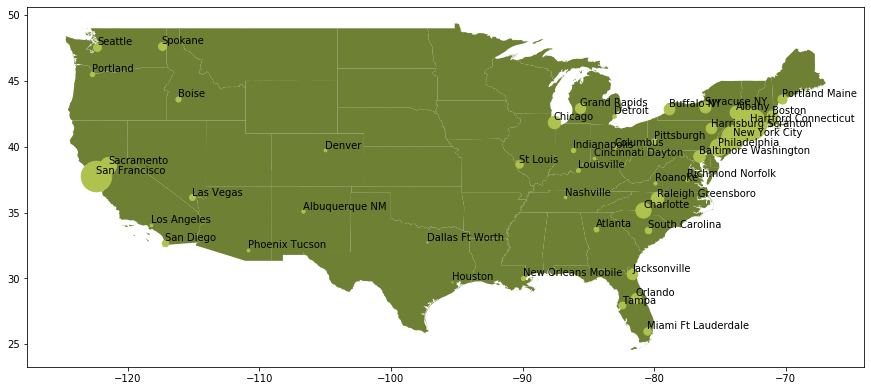

In [73]:
rollup_graph(df_2, 'AveragePrice', 'mean', us_map)

In [72]:
df_reg_gb_2 = df_2.groupby(['region_tmp', 'long', 'lat'], as_index = False).agg({'AveragePrice':'mean'})

In [ ]:
crs = {'init':'epsg:4326'}
geometry_2 = [Point(xy) for xy in zip(df_reg_gb_2['long'], df_reg_gb_2['lat'])]

In [ ]:
geo_df_2 = gpd.GeoDataFrame(df_reg_gb_2, crs = crs,
                         geometry = geometry_2)

In [ ]:
fig, ax = plt.subplots(figsize = (15, 15))
us_map.plot(ax=ax, color = '#6e8033')
for i, row in enumerate(geo_df_2.iterrows()):
    normalized = (row[1]['AveragePrice'] - min(geo_df_2['AveragePrice']))/(max(geo_df_2['AveragePrice']) - min(geo_df_2['AveragePrice']))
    geo_df_2.geometry.iloc[i:i+1].plot(ax = ax, markersize = (normalized+1)**10, color = '#aec24d')
    ax.annotate(row[1]['region_tmp'],
                (row[1]['long'],row[1]['lat']), verticalalignment='bottom', horizontalalignment='left')

In [46]:
# There's quite the concentration in the northeast. Let's limit the map down to only
# look at regions on the east side of the country.
geo_df_east = geo_df_2.loc[geo_df_2['long'] >=
                 int(geo_df_2.loc[geo_df_2['region_tmp'] == 'St Louis', 'long'])]

In [47]:
# I pulled these states from some random website. They're not clean so
# we'll tidy up the strings a bit.
east_states = """Alabama
Connecticut
Delaware
Florida
Georgia
Illinois
Indiana
Kentucky
Maine
Maryland
Massachusetts
Michigan
Mississippi
New Hampshire
New Jersey
New York
North Carolina
Ohio
Pennsylvania
Rhode Island
South Carolina
Tennessee
Vermont
Virginia
West Virginia
Wisconsin
ALABAMA
CONNECTICUT
DELAWARE
FLORIDA
GEORGIA
ILLINOIS
INDIANA
KENTUCKY
MAINE
MARYLAND
MASSACHUSETTS
MICHIGAN
MISSISSIPPI
NEW HAMPSHIRE
NEW JERSEY
NEW YORK
NORTH CAROLINA
OHIO
PENNSYLVANIA
RHODE ISLAND
SOUTH CAROLINA
TENNESSEE
VERMONT
VIRGINIA
WEST VIRGINIA
WISCONSIN
Louisiana""".lower()

In [48]:
east_states = [x.title() for x in east_states.split('\n')]

In [49]:
# I wanted to see if I could guess states by their shape. This is totally
# unrelated to the analysis, haha
num = [x for x in us_map.index]
random.shuffle(num)
i=0

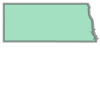

In [50]:
#state guessing, just for fun
us_map['geometry'][num[i]]

In [51]:
time.sleep(5)
print(us_map['NAME'][num[i]])
i += 1

North Dakota


In [52]:
us_map_east = us_map.loc[us_map['NAME'].isin(east_states)]

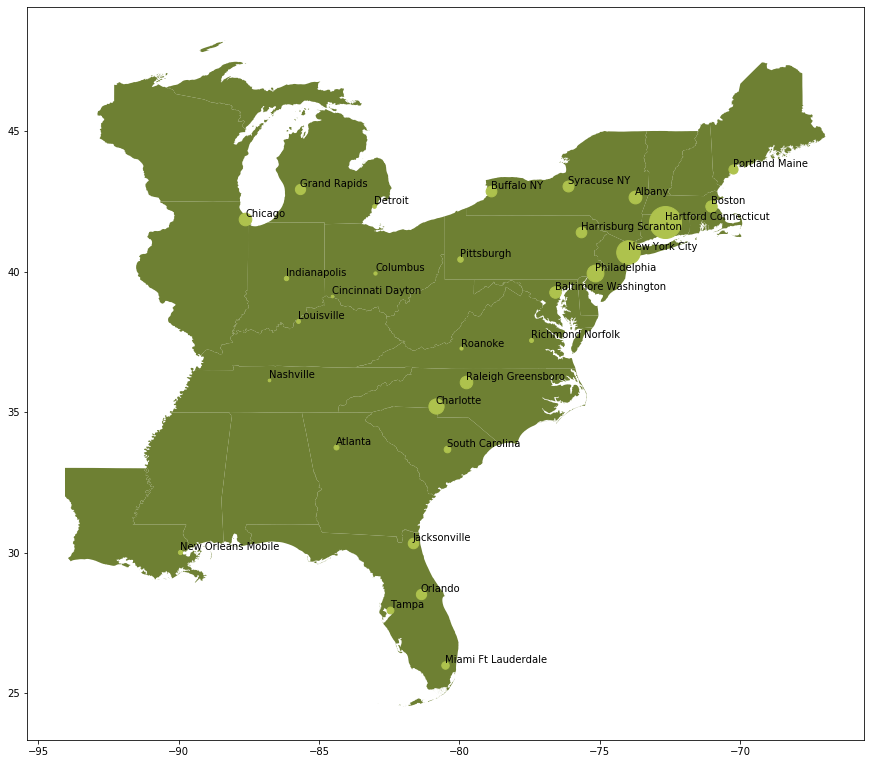

In [53]:
fig, ax = plt.subplots(figsize = (15, 15))
us_map_east.plot(ax=ax, color = '#6e8033')
for i, row in enumerate(geo_df_east.iterrows()):
    normalized = (row[1]['AveragePrice'] - min(geo_df_2['AveragePrice']))/(max(geo_df_2['AveragePrice']) - min(geo_df_2['AveragePrice']))
    geo_df_east.geometry.iloc[i:i+1].plot(ax = ax, markersize = (normalized+1)**10, color = '#aec24d')
    ax.annotate(row[1]['region_tmp'],
                (row[1]['long'],row[1]['lat']), verticalalignment='bottom', horizontalalignment='left')

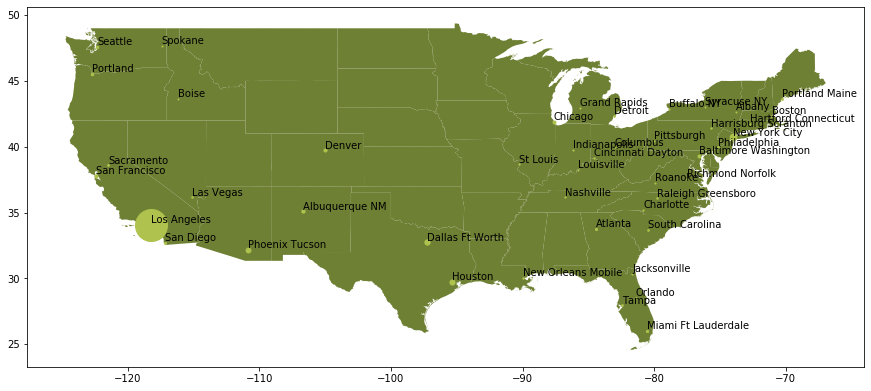

In [90]:
rollup_graph(df_2,'Total Volume', 'mean', us_map)

In [94]:
df_2.groupby(['region_tmp', 'year'], as_index = False).agg({'Total Volume':'mean'})\
    .sort_values(by = 'Total Volume', ascending = False)

,region_tmp,year,Total Volume
87,Los Angeles,2018,1.585516e+06
85,Los Angeles,2016,1.568676e+06
86,Los Angeles,2017,1.495105e+06
84,Los Angeles,2015,1.425199e+06
107,New York City,2018,9.887190e+05
...,...,...,...
0,Albany,2015,3.874900e+04
16,Boise,2015,3.638805e+04
174,Syracuse NY,2017,3.520734e+04
173,Syracuse NY,2016,3.297470e+04


In [97]:
print('LA total volume avg: '\
      + str(df_2.loc[df_2['region_tmp'] == 'Los Angeles', 'Total Volume'].mean())\
      + '\nNew York City total volume avg: '\
      + str(df_2.loc[df_2['region_tmp'] == 'New York City', 'Total Volume'].mean())\
      + '\n\nLA sure does love their avocados!')
    

LA total volume avg: 1502652.5077810653
New York City total volume avg: 712231.1465384616

LA sure does love their avocados!


### Some chronological analysis

In [54]:
price_growth = df_2.groupby(['Date', 'region_tmp', 'lat', 'long'], as_index = False).agg({'AveragePrice':'mean'})

In [55]:
# This function groups regions by their location according
# to latitude or longitude.
def group_regions(df, region_col, num_per_group, divide):
    region_set = set(df[region_col].unique().tolist())
    df = df.groupby([region_col, 'lat', 'long'], as_index = False).agg("count")
    first_coor = [max(df['long']), max(df['lat'])]
    last_coor = [min(df['long']), min(df['lat'])]
    i = 1
    x_1 = first_coor[0]
    y_1 = first_coor[1]
    step_x = (first_coor[0]-last_coor[0])/1000
    step_y = (first_coor[1]-last_coor[1])/1000
    groups = []
    tmp = []
    while len(region_set) > 0:
        if len(tmp) >= num_per_group:
            groups.append(tmp)
            tmp = []
        x_2 = x_1 - step_x * i 
        y_2 = y_1 - step_y * i
        if divide == 'long':
            in_zone = df.loc[(df[region_col].isin(region_set)) & (df['long'] <= x_1)
                                & (df['long'] > x_2), region_col]\
                                .values.tolist()
        elif divide == 'lat':
            in_zone = df.loc[(df[region_col].isin(region_set)) & (df['lat'] <= y_1)
                    & (df['lat'] > y_2), region_col]\
                    .values.tolist()
            
        tmp.extend(in_zone)
        region_set = region_set - set(in_zone)
        i += 1 
    return groups

In [56]:
groups = group_regions(price_growth, 'region_tmp', 5, 'long')

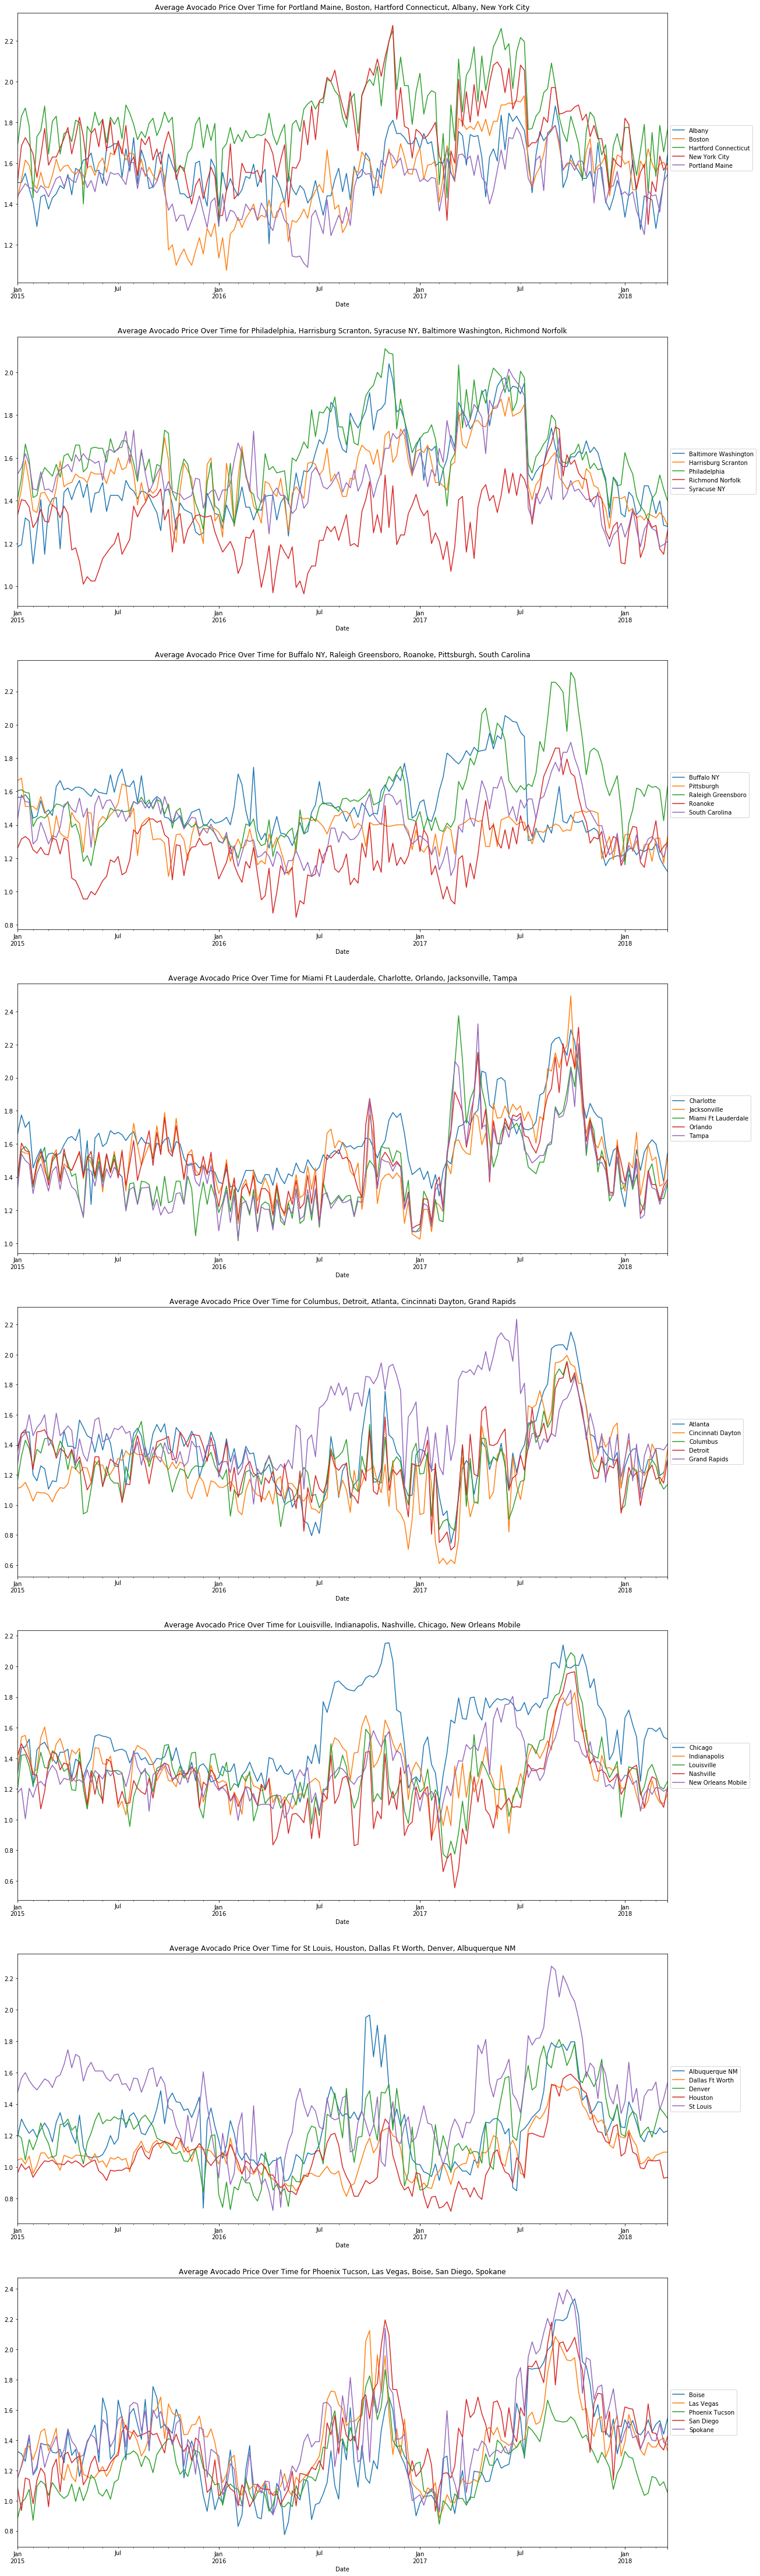

In [57]:
# Charts of AveragePrice over time split out by location
fig, axs = plt.subplots(len(groups), figsize=(20, 80))
for i in range(len(groups)):
    filterd = price_growth.loc[price_growth['region_tmp'].isin(groups[i]),]
    filterd.pivot(index='Date', columns='region_tmp', values='AveragePrice').plot(ax=axs[i], 
    title = 'Average Avocado Price Over Time for '+ ', '.join(groups[i]))\
    .legend(loc='center left',bbox_to_anchor=(1.0, 0.5))